# Lecture 06. Unsupervised learning. Clustering. k-Means
    

## Clustering NBA players

Some <a href="http://www.databasebasketball.com/about/aboutstats.htm">info</a> on players' features.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

nba = pd.read_csv("../../data/nba_2013.csv")
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


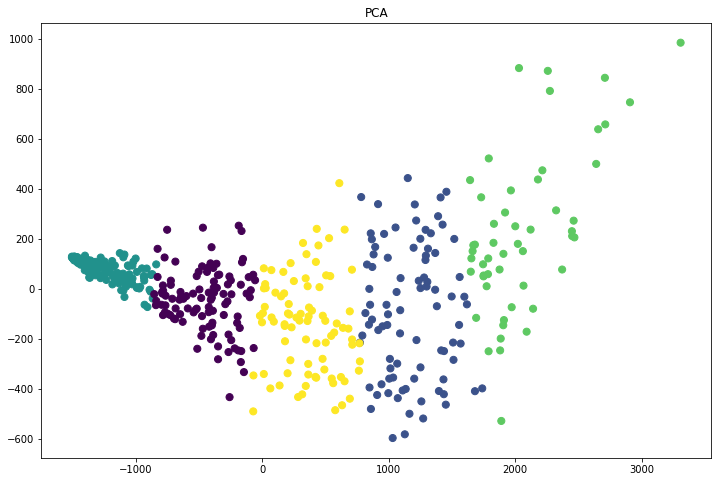

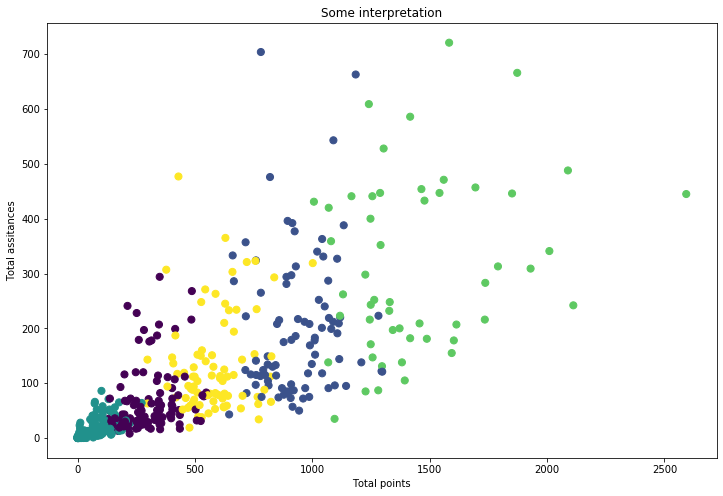

In [2]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=5, random_state=1)
numeric_cols = nba._get_numeric_data().dropna(axis=1)
kmeans.fit(numeric_cols)


# Visualizing using PCA
pca = PCA(n_components=2)
res = pca.fit_transform(numeric_cols)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=kmeans.labels_, s=50, cmap='viridis')
plt.title('PCA')

# Visualizing using 2 features: Total points vs. Total assists
plt.figure(figsize=(12,8))
plt.scatter(nba['pts'], nba['ast'], 
            c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('Total points')
plt.ylabel('Total assitances')
plt.title('Some interpretation');

## Compressing images with k-Means 
*not a popular technique*

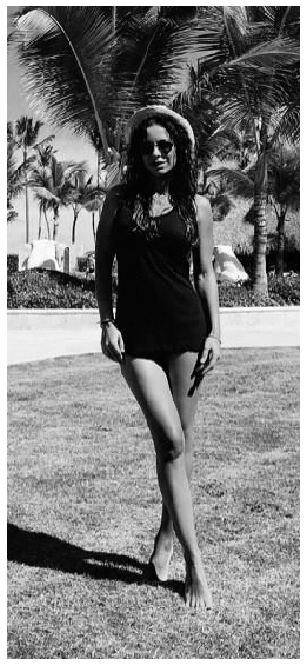

In [3]:
import matplotlib.image as mpimg
img = mpimg.imread('../../img/woman.jpg')[..., 1]
plt.figure(figsize = (20, 12))
plt.axis('off')
plt.imshow(img, cmap='gray');

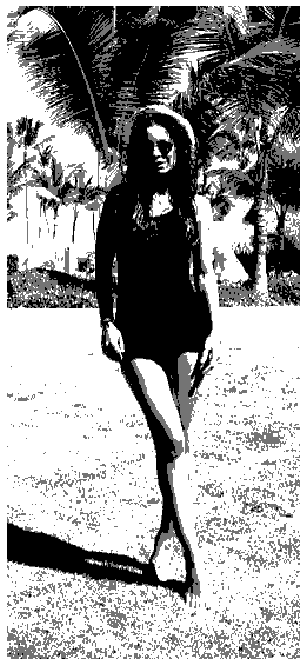

In [4]:
from sklearn.cluster import MiniBatchKMeans
from scipy.stats import randint

X = img.reshape((-1, 1))
k_means = MiniBatchKMeans(n_clusters=3)
k_means.fit(X) 
values = k_means.cluster_centers_
labels = k_means.labels_
img_compressed = values[labels].reshape(img.shape)
plt.figure(figsize = (20, 12))
plt.axis('off')
plt.imshow(img_compressed, cmap = 'gray');

# Finding latent topics in texts

**We'll apply k-Means to cluster texts from 4 categories.**

In [5]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from time import time
import numpy as np

categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space']

print("Loading 20 newsgroups dataset for categories:")
print(categories)

dataset = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=True, random_state=42)

print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))

labels = dataset.target
true_k = np.unique(labels).shape[0]

Loading 20 newsgroups dataset for categories:
['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
3387 documents
4 categories


**Build Tf-Idf features for texts**

idf = n_documents / n_documents_containing_the_word


tfidf = number_of_occurences_of_the_word * idf

In [7]:
print("Extracting features from the training dataset using a sparse vectorizer")
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000,
                             min_df=2, stop_words='english')

X = vectorizer.fit_transform(dataset.data)
print("n_samples: %d, n_features: %d" % X.shape)
print(X[0])


Extracting features from the training dataset using a sparse vectorizer
n_samples: 3387, n_features: 1000
  (0, 266)	0.09257190271659897
  (0, 824)	0.10236504109444217
  (0, 676)	0.112172917852521
  (0, 961)	0.12376976720648043
  (0, 220)	0.11941170705436456
  (0, 912)	0.09020137388058583
  (0, 317)	0.11110439285365865
  (0, 284)	0.05826542318415168
  (0, 604)	0.12490509377996681
  (0, 682)	0.12433151690615415
  (0, 100)	0.10908540302673299
  (0, 159)	0.12037619344485845
  (0, 982)	0.06843475414832859
  (0, 777)	0.09982607960323521
  (0, 122)	0.163643816508636
  (0, 965)	0.06989560154406659
  (0, 650)	0.1314226423578799
  (0, 672)	0.15515938927538753
  (0, 126)	0.0840572850361928
  (0, 889)	0.06296770275121602
  (0, 102)	0.3008753956625971
  (0, 282)	0.08579400349744988
  (0, 894)	0.12163189473912746
  (0, 193)	0.09127638629350456
  (0, 955)	0.2486630338123083
  (0, 630)	0.1075101726968624
  (0, 535)	0.14773071771492421
  (0, 839)	0.11385864486694537
  (0, 800)	0.19252082037901888
  (0

**Apply k-Means to the vectors that we've got. Also, calculate clustering metrics.**

In [8]:
from sklearn.cluster import KMeans
for i in [2, 3, true_k, 5]:
    km = KMeans(n_clusters=i, init='k-means++', 
                max_iter=100, n_init=1)

    print("{} Clustering sparse data with {}".format(i, km))
    t0 = time()
    km.fit(X)

    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
    print("Adjusted Rand-Index: %.3f"
          % metrics.adjusted_rand_score(labels, km.labels_))
    print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(X, km.labels_, sample_size=1000))

    order_centroids = km.cluster_centers_.argsort()[:, ::-1]

2 Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
Homogeneity: 0.228
Completeness: 0.600
V-measure: 0.330
Adjusted Rand-Index: 0.169
Silhouette Coefficient: 0.012
3 Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
Homogeneity: 0.469
Completeness: 0.608
V-measure: 0.530
Adjusted Rand-Index: 0.477
Silhouette Coefficient: 0.017
4 Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=4, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
Homogeneity: 0.506
Completeness: 0.579
V-measure: 0.540
Adjusted Rand-Index: 0.481
Silhouette Coefficient: 0

**Output words that are close to cluster centers**

In [10]:
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % (i + 1), end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 1: sandvik sgi keith com livesey kent apple newton caltech jon
Cluster 2: graphics university com thanks image posting host nntp ac computer
Cluster 3: space nasa access henry digex gov pat toronto alaska shuttle
Cluster 4: god com people don article say jesus think just christian


## Clustering handwritten digits

In [11]:
from sklearn.datasets import load_digits

digits = load_digits()

X, y = digits.data, digits.target

In [12]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y, kmeans.predict(X))

0.665031845251332

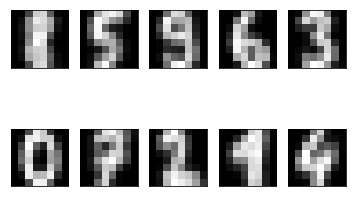

In [14]:
_, axes = plt.subplots(2, 5)
for ax, center in zip(axes.ravel(), kmeans.cluster_centers_):
    ax.matshow(center.reshape(8, 8), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())

Author: [Yury Kashnitskiy](https://yorko.github.io). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.